In [ ]:
"""https://jawadfruit.streamlit.app"""

In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/classification-data-apples-oranges/apples_and_oranges.csv


   Weight  Size   Class
0      69  4.39  orange
1      69  4.21  orange
2      65  4.09  orange
3      72  5.85   apple
4      67  4.70  orange
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB
None
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-score : 1.0


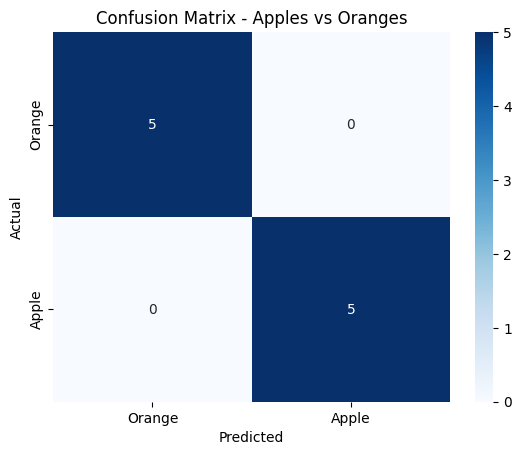

In [12]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load dataset
# -----------------------------
df = pd.read_csv(
    "/kaggle/input/classification-data-apples-oranges/apples_and_oranges.csv"
)

print(df.head())
print(df.info())

# -----------------------------
# 2. Encode target variable
# -----------------------------
df["Class"] = df["Class"].map({"apple": 1, "orange": 0})

# -----------------------------
# 3. Split features and target
# -----------------------------
X = df[["Weight", "Size"]]
y = df["Class"]

# -----------------------------
# 4. Train-test split (75-25)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# -----------------------------
# 5. Train Random Forest
# -----------------------------
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)

# -----------------------------
# 6. Predictions
# -----------------------------
y_pred = rf.predict(X_test)

# -----------------------------
# 7. Evaluation metrics
# -----------------------------
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)

# -----------------------------
# 8. Confusion Matrix
# -----------------------------
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Orange", "Apple"],
    yticklabels=["Orange", "Apple"]
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Apples vs Oranges")
plt.show()


In [13]:
import joblib

# Save model to disk
joblib.dump(rf, "apples_oranges.pkl")


['apples_oranges.pkl']

In [14]:
import sys
print("Python version:", sys.version)
import sklearn
print("scikit-learn version:", sklearn.__version__)

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
scikit-learn version: 1.6.1
